# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

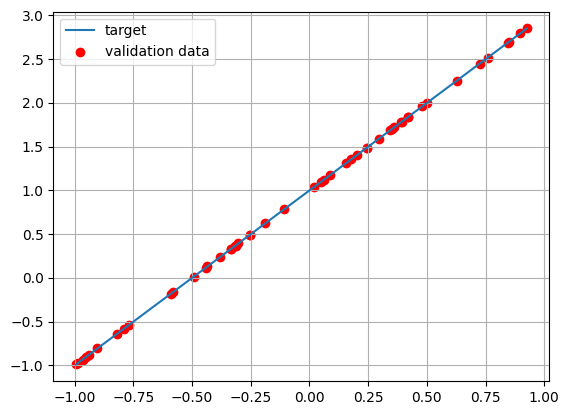

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [2]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2024-10-23 14:41:21.778856: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-23 14:41:21.795427: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 14:41:21.884413: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 14:41:21.976865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 14:41:22.052438: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9614 - mse: 0.9614 - val_loss: 0.5658 - val_mse: 0.5658
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5258 - mse: 0.5258 - val_loss: 0.3152 - val_mse: 0.3152
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3067 - mse: 0.3067 - val_loss: 0.1810 - val_mse: 0.1810
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1757 - mse: 0.1757 - val_loss: 0.1078 - val_mse: 0.1078
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1057 - mse: 0.1057 - val_loss: 0.0669 - val_mse: 0.0669
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0653 - mse: 0.0653 - val_loss: 0.0435 - val_mse: 0.0435
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0232 - mse:

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [7]:
# return weights and biases
model.get_weights()

[array([[1.9787604]], dtype=float32), array([0.9996764], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3935e-04 - mse: 1.3935e-04

Test loss: 0.0001432902499800548
Test accuracy: 0.0001432902499800548


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3935e-04 - mse: 1.3935e-04

Test loss: 0.0001432902499800548
Test accuracy: 0.0001432902499800548


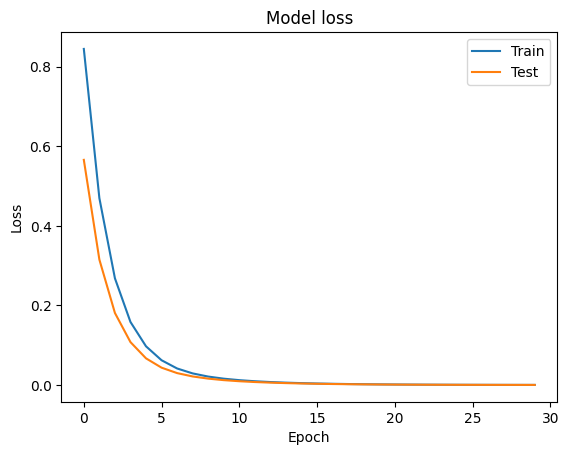

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


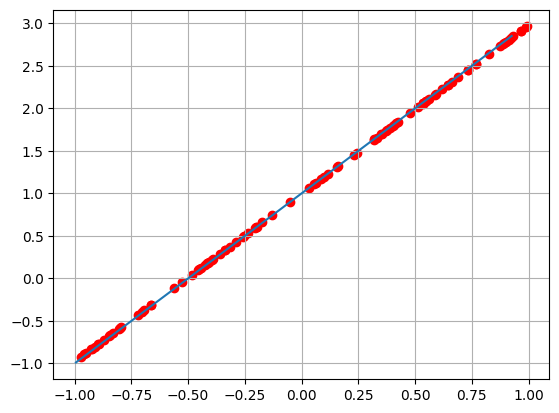

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Input
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [3]:
iper_epochs=[25,50,75,100]
iper_ntrain=[100,500,900,1500]
iper_sigma=[0.1,0.25,0.5,1,1.5]

In [4]:
m=2
b=1

def generate_set(n_train,_sigma):

    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n_train)
    x_valid = np.random.uniform(-1, 1, int(n_train*0.2))
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    y_train = np.random.normal(m * x_train + b, _sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, _sigma)

    return x_train,y_train,x_valid,y_valid,y_target

In [5]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

/home/alberto/Scrivania/labdataphy/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730048244.908571    6897 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-27 17:57:24.918552: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries f

In [6]:
history={}
x_valid={}
y_valid={}
score_valid={}
score_target={}
for elem in iper_epochs:
    for j in iper_ntrain:
        for k in iper_sigma:
            key = f'step_{elem}_{j}_{k}'
            x_train,y_train,x_valid[key],y_valid[key],y_target=generate_set(j,k)
            history[key]=model.fit(x=x_train, y=y_train, batch_size=32, epochs=elem,shuffle=True, validation_data=(x_valid[key], y_valid[key]))
            score_valid[key]=model.evaluate(x_valid[key], y_valid[key], batch_size=32, verbose=1)
            score_target[key]=model.evaluate(x_valid[key], y_target, batch_size=32, verbose=1)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 2.2472 - mse: 2.2472 - val_loss: 2.8045 - val_mse: 2.8045
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.1664 - mse: 2.1664 - val_loss: 2.5155 - val_mse: 2.5155
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.7867 - mse: 1.7867 - val_loss: 2.3211 - val_mse: 2.3211
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.5113 - mse: 1.5113 - val_loss: 2.1458 - val_mse: 2.1458
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.5601 - mse: 1.5601 - val_loss: 1.9582 - val_mse: 1.9582
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.4887 - mse: 1.4887 - val_loss: 1.7999 - val_mse: 1.7999
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3666 - mse: 1.3666 - val_loss: 1.6642 - val_mse: 1.6642
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.4192 - mse: 1.4192 - val_loss: 1.5253 - val_mse: 1.5253
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.1638 - mse: 1.1638 -

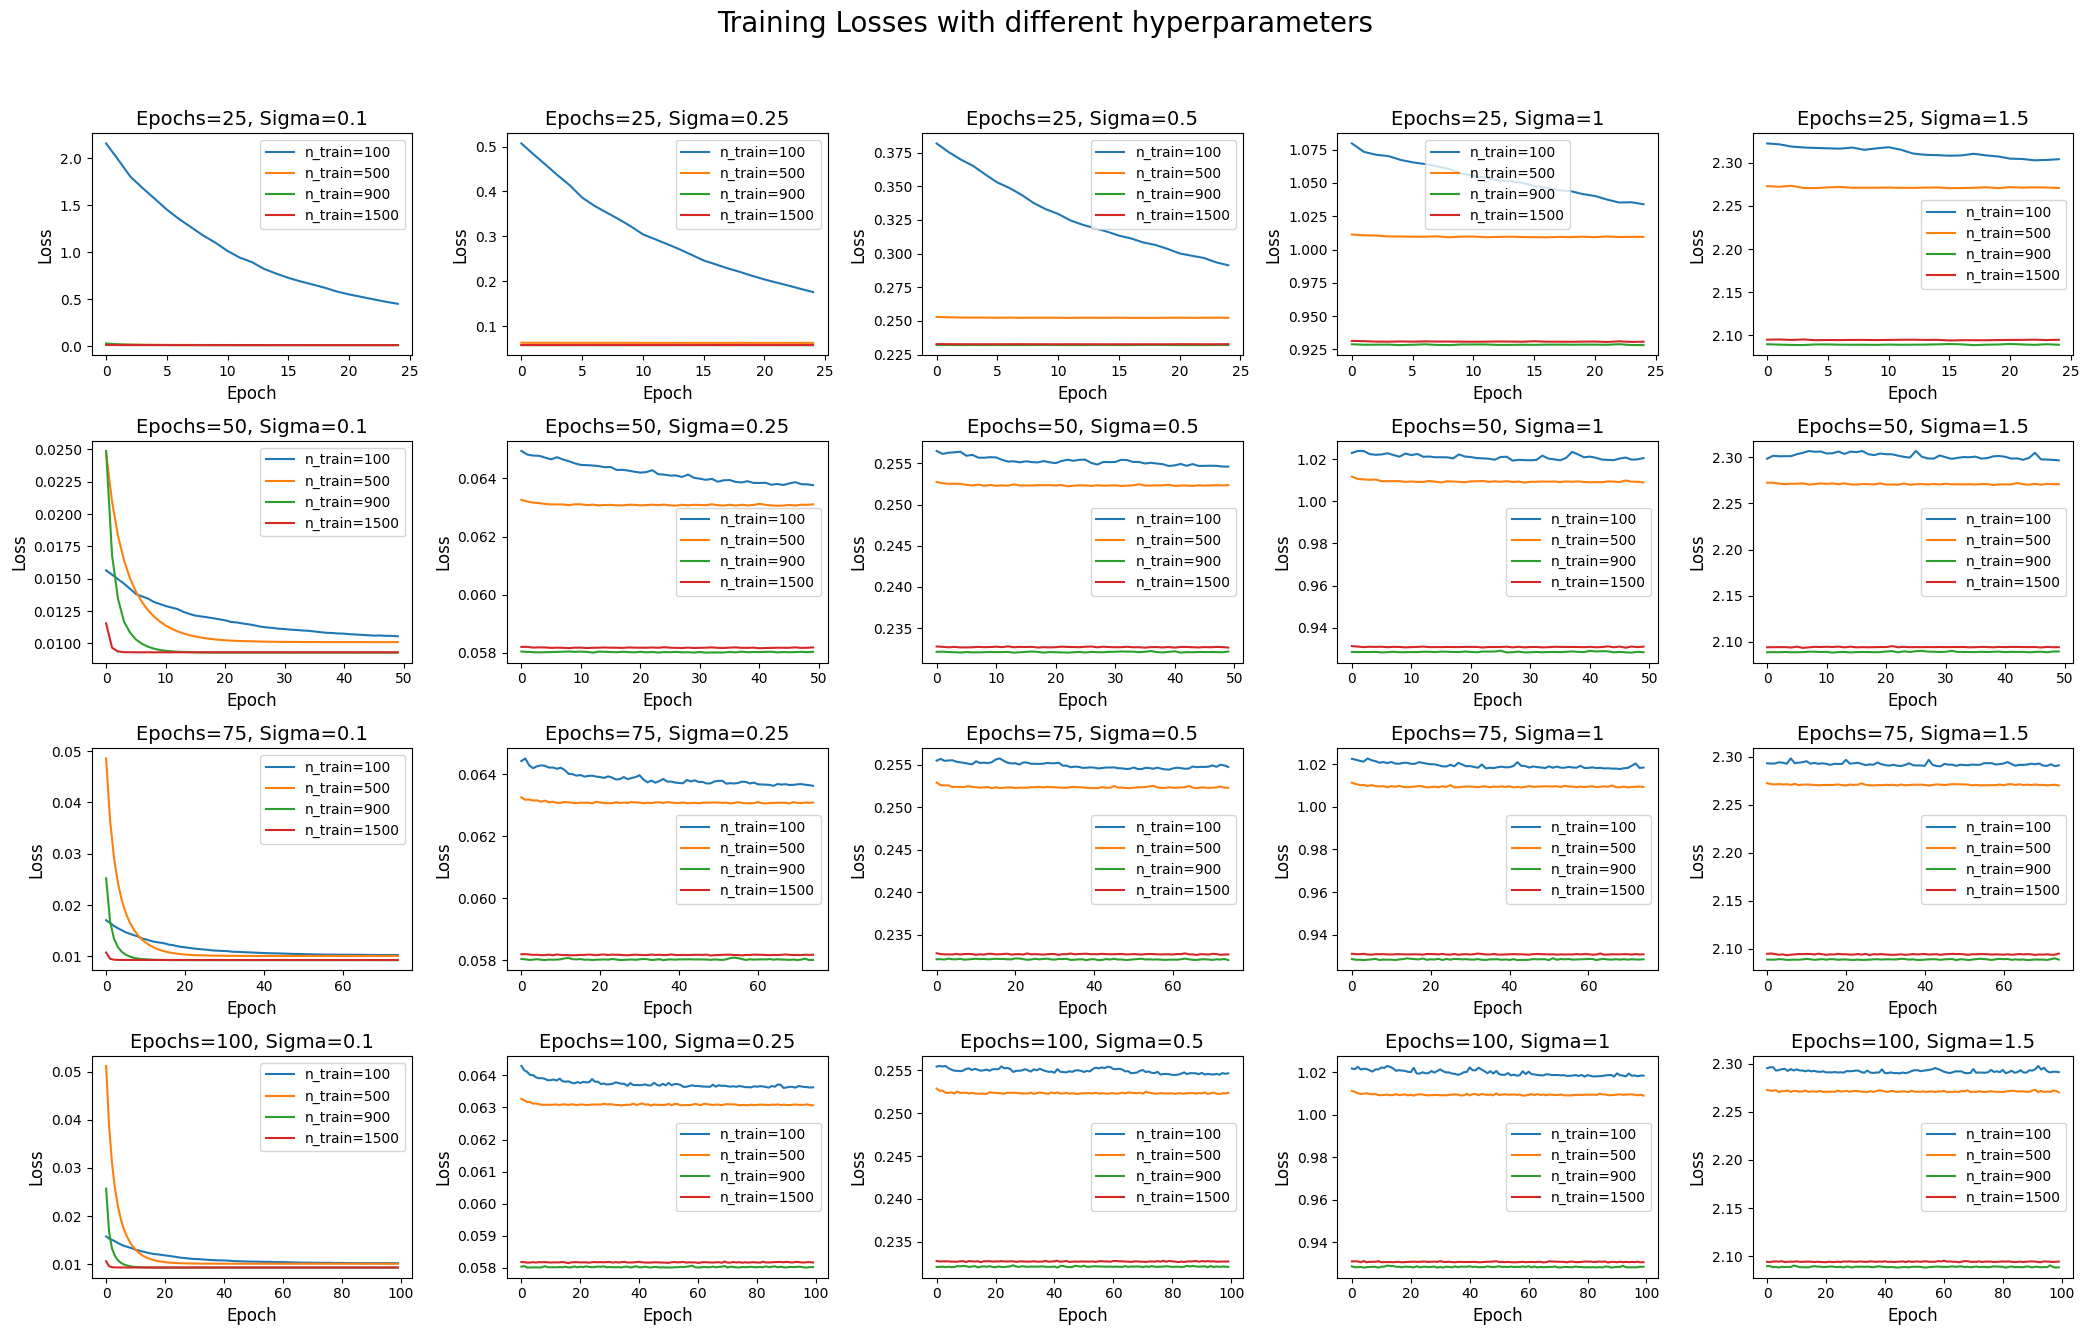

In [7]:
fig, axes = plt.subplots(len(iper_epochs), len(iper_sigma), figsize=(21, 14), sharex=False, sharey=False)
fig.suptitle('Training Losses with different hyperparameters', fontsize=20)

for i, epoch in enumerate(iper_epochs):
    for j, sigma in enumerate(iper_sigma):
        ax = axes[i, j]
        for n_train in iper_ntrain:
            key = f'step_{epoch}_{n_train}_{sigma}'
            if key in history:
                ax.plot(history[key].history['loss'], label=f'n_train={n_train}')
            
        ax.set_title(f'Epochs={epoch}, Sigma={sigma}',fontsize=14)
        ax.legend()
        ax.set_xlabel('Epoch',fontsize=12)
        ax.set_ylabel('Loss',fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

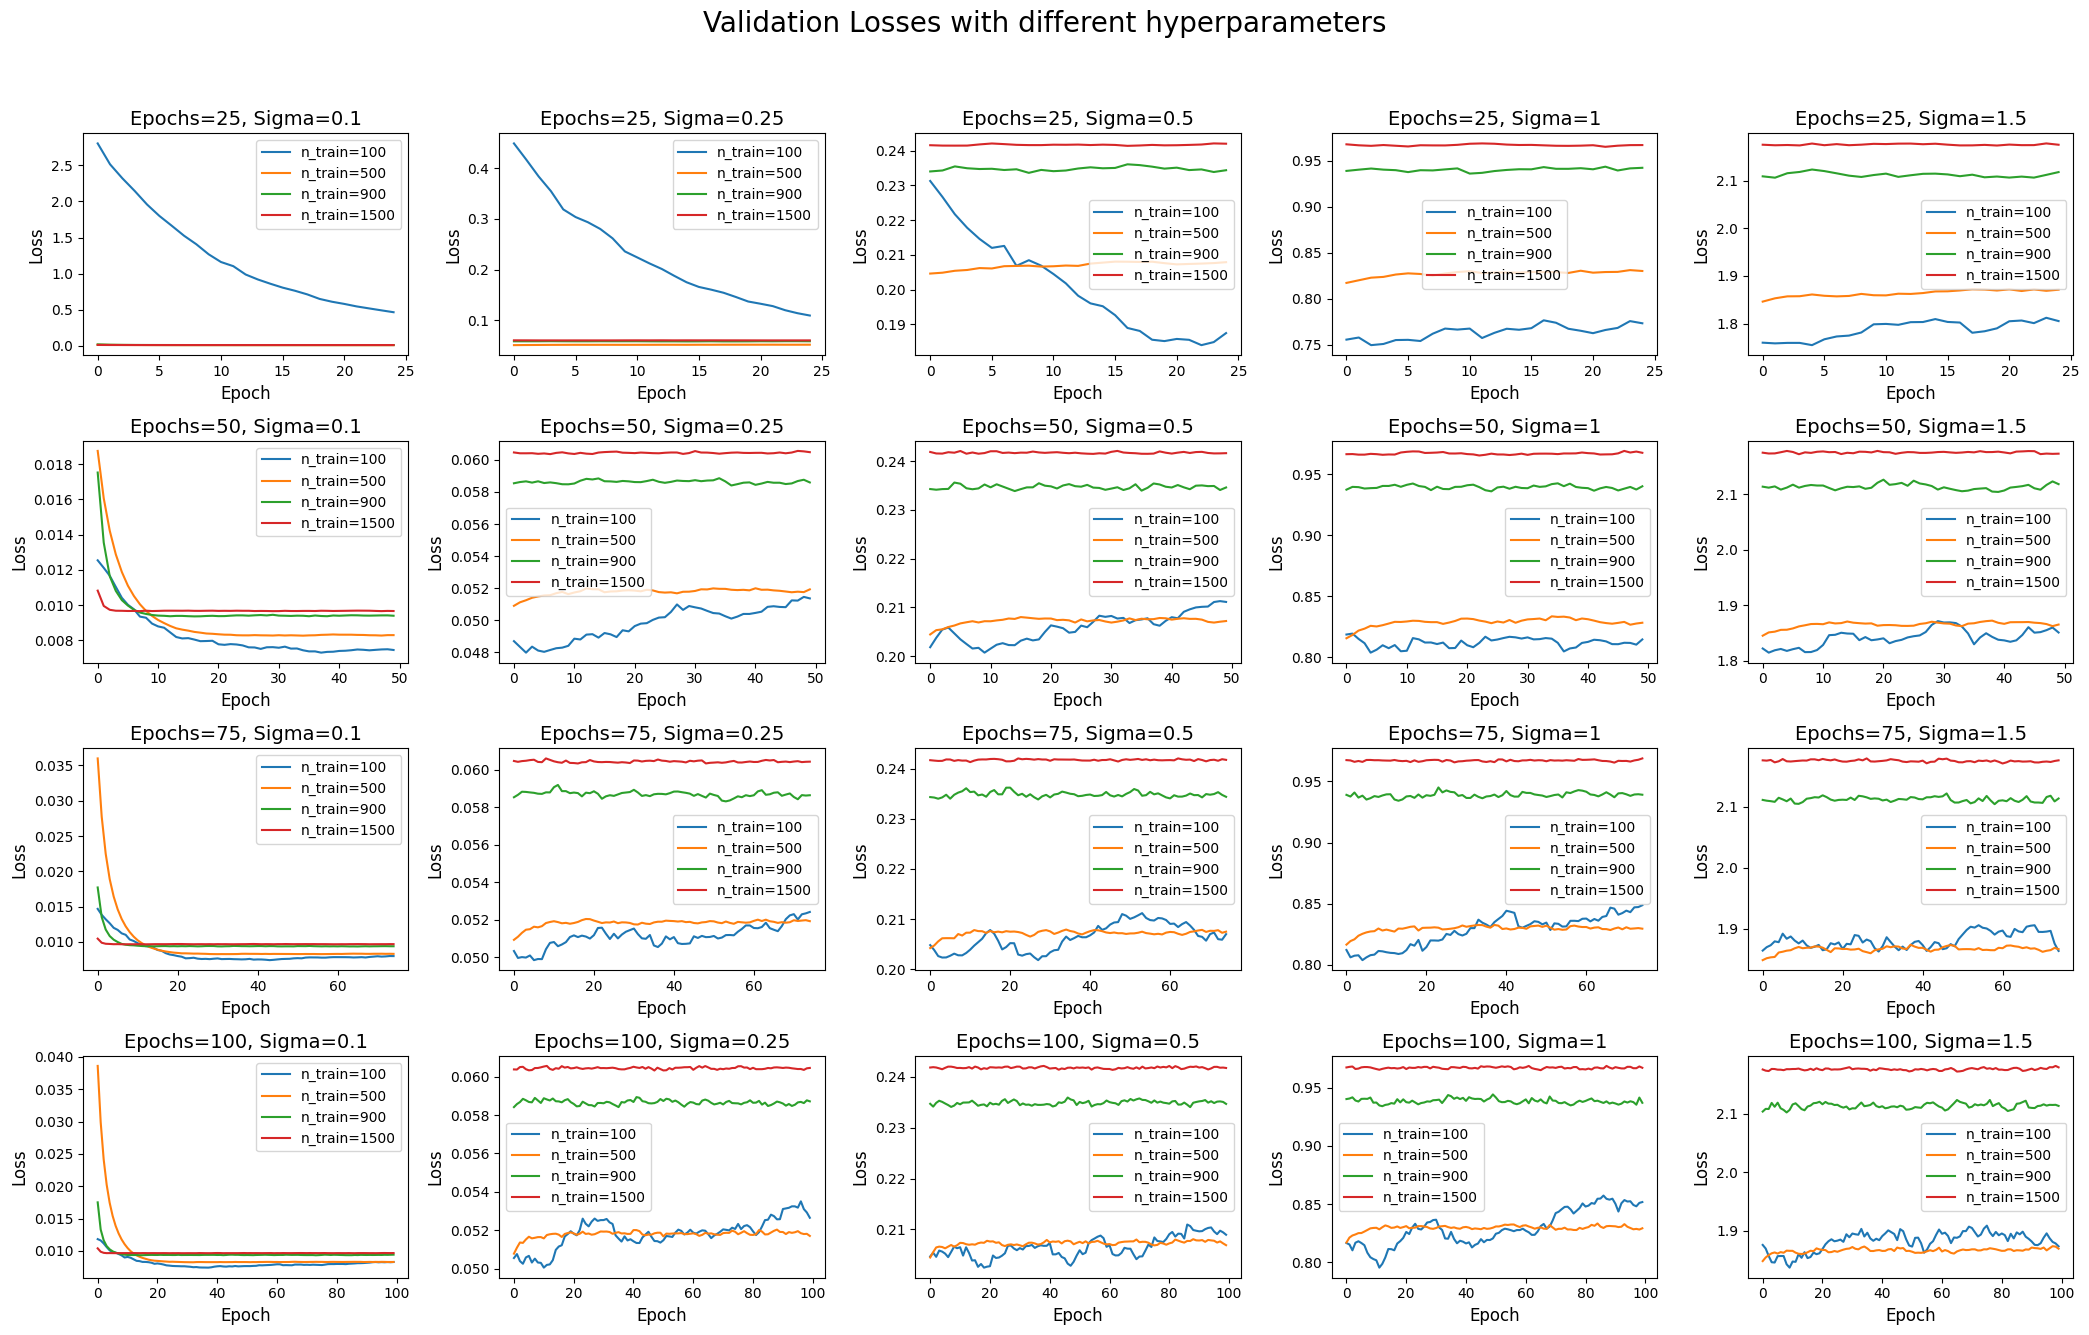

In [8]:
fig, axes = plt.subplots(len(iper_epochs), len(iper_sigma), figsize=(21, 14), sharex=False, sharey=False)
fig.suptitle('Validation Losses with different hyperparameters', fontsize=20)

for i, epoch in enumerate(iper_epochs):
    for j, sigma in enumerate(iper_sigma):
        ax = axes[i, j]
        for n_train in iper_ntrain:
            key = f'step_{epoch}_{n_train}_{sigma}'
            if key in history:
                ax.plot(history[key].history['val_loss'], label=f'n_train={n_train}')
            
        ax.set_title(f'Epochs={epoch}, Sigma={sigma}',fontsize=14)
        ax.legend()
        ax.set_xlabel('Epoch',fontsize=12)
        ax.set_ylabel('Loss',fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


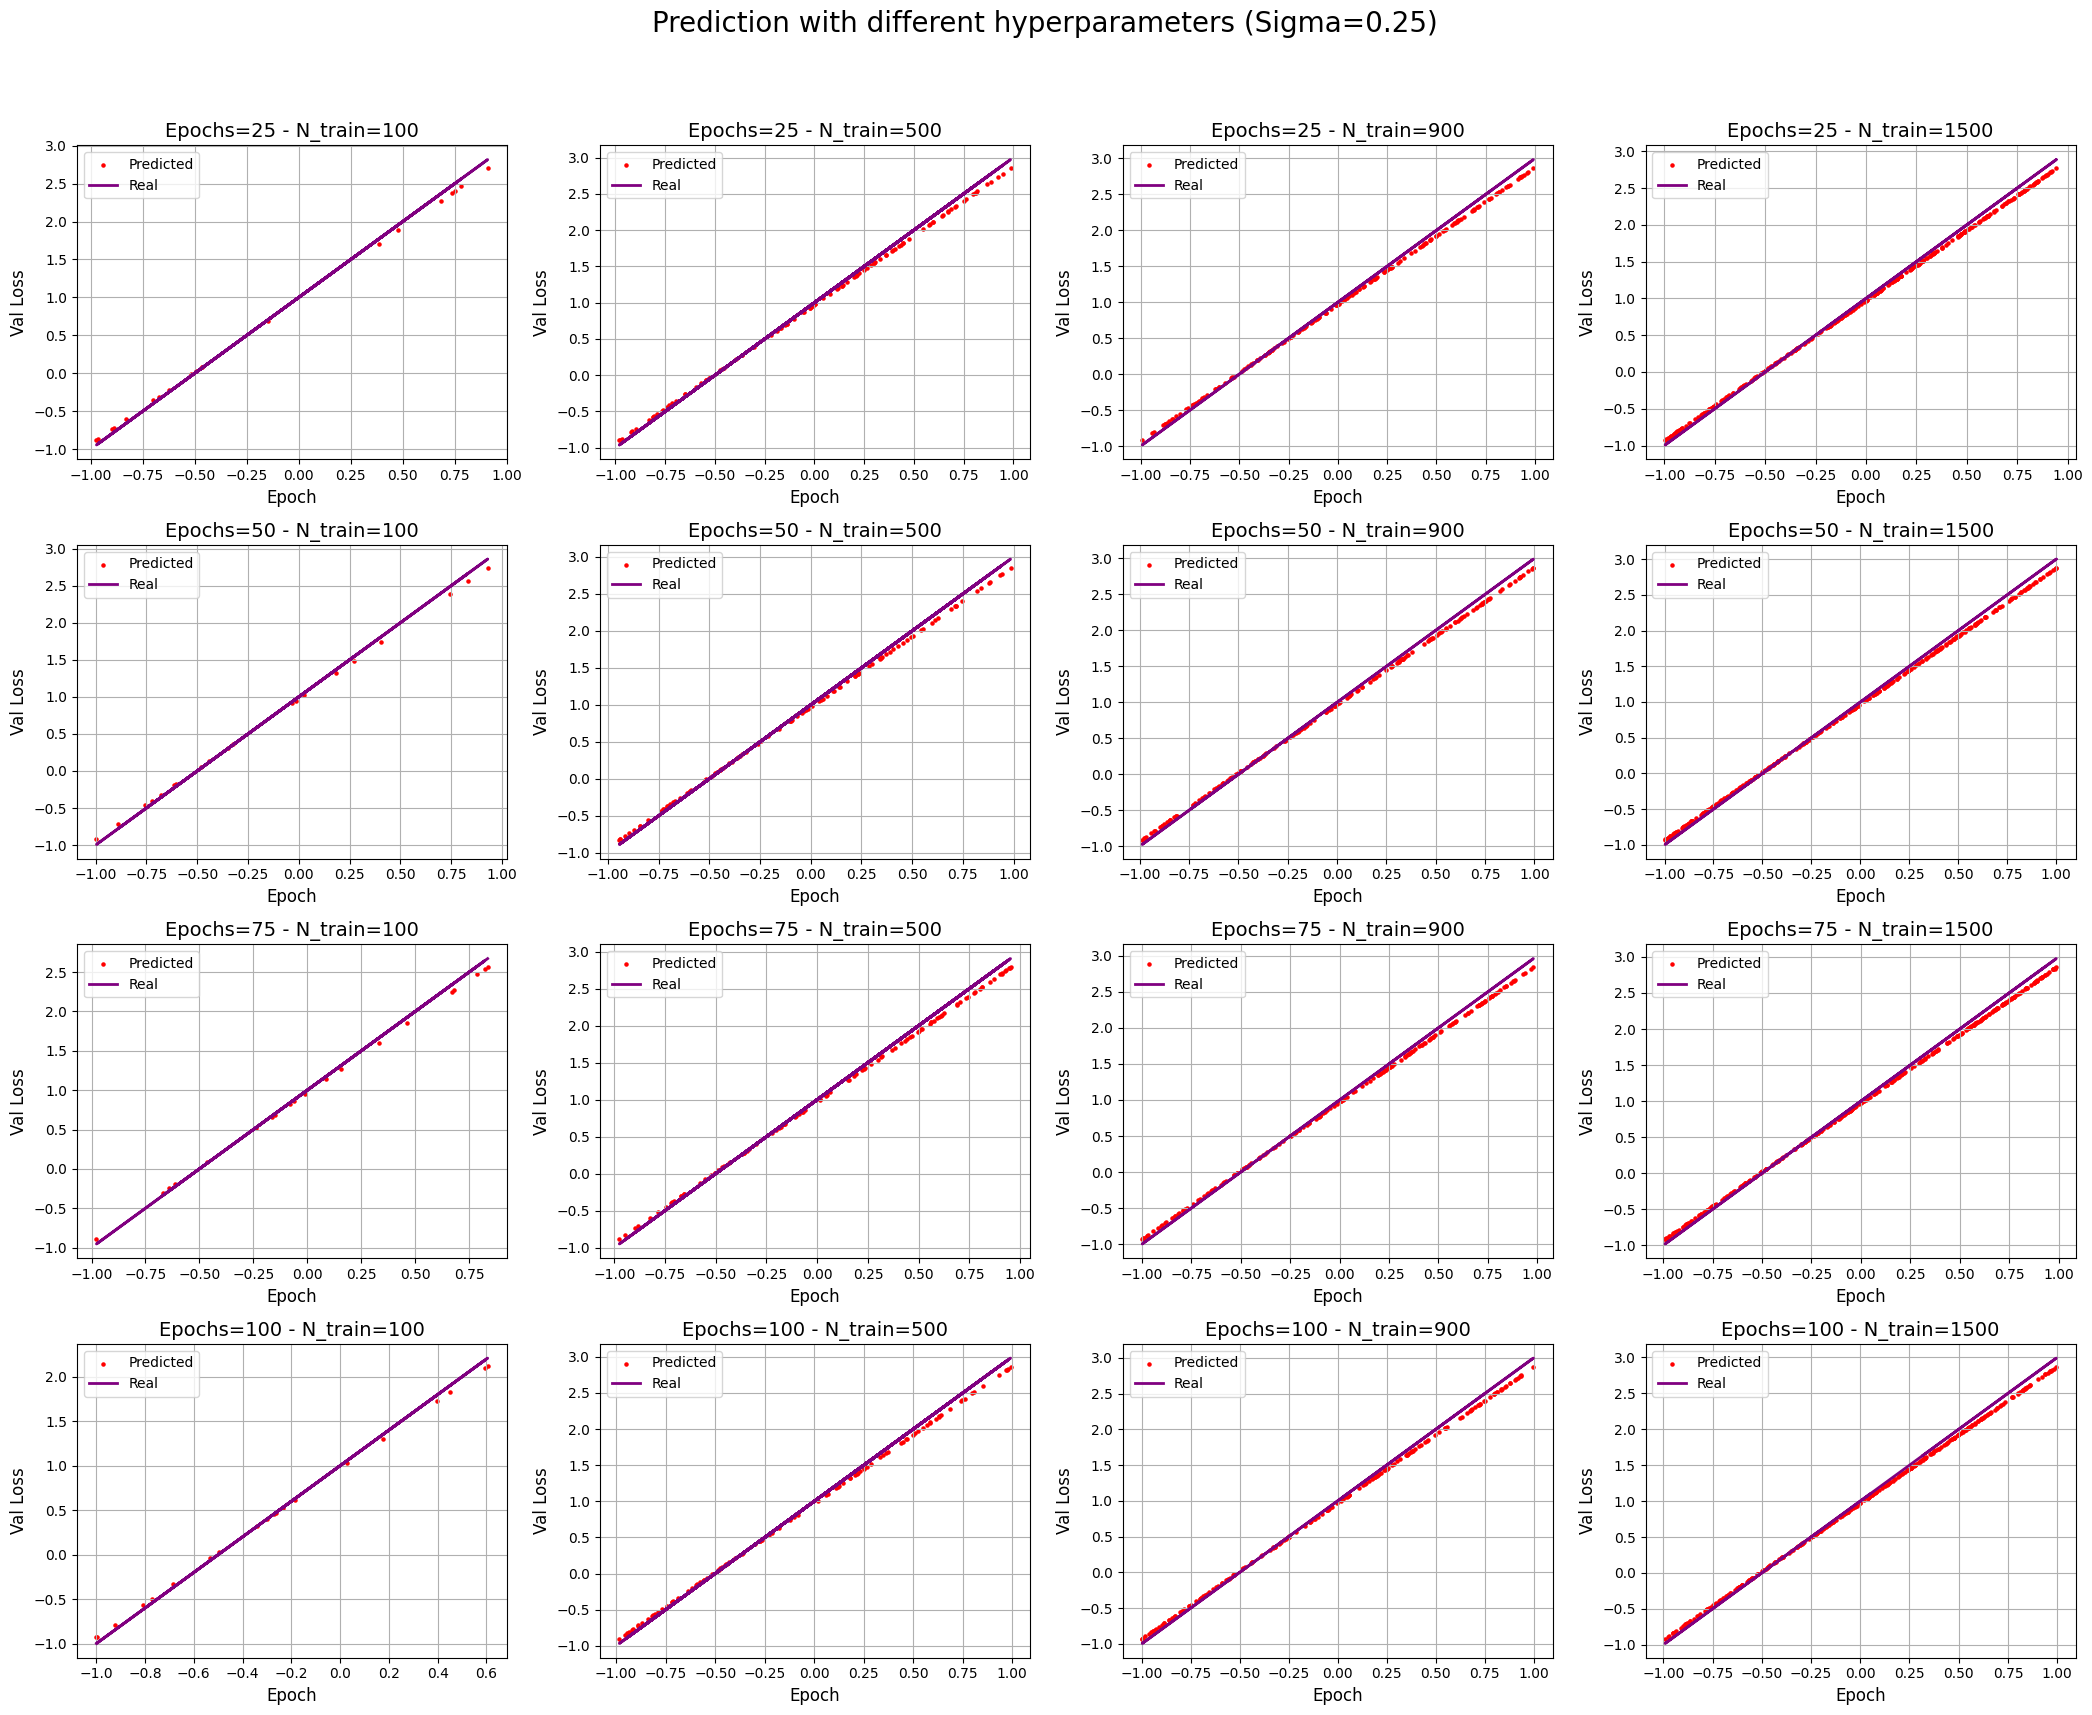

In [9]:
sigma=iper_sigma[1] #change index to get different values of sigma from 0 to 4

fig, axes = plt.subplots(len(iper_epochs), len(iper_ntrain), figsize=(21, 18), sharex=False, sharey=False)
fig.suptitle(f'Prediction with different hyperparameters (Sigma={sigma})', fontsize=20)

for i, epoch in enumerate(iper_epochs):
    for j, n_train in enumerate(iper_ntrain):
        ax = axes[i, j]
        key = f'step_{epoch}_{n_train}_{sigma}'
        x_predicted = np.random.uniform(-1, 1, len(x_valid[key]))
        y_predicted = model.predict(x_predicted)
        if key in x_valid:
            ax.scatter(x_predicted, y_predicted,s=5,color='r',label=r'Predicted')
            ax.plot(x_predicted,m * x_predicted + b ,linewidth=2,color='purple',label=r'Real')
            
        ax.set_title(f'Epochs={epoch} - N_train={n_train}',fontsize=14)
        ax.legend()
        ax.set_xlabel('Epoch',fontsize=12)
        ax.set_ylabel('Val Loss',fontsize=12)
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [10]:
iper_epochs=[25,50,75,100]
iper_ntrain=[100,500,900,1500]
iper_sigma=[0.1,0.25,0.5,1,1.5]

In [11]:
#function
def f(x):
    return 4-3*x-2*(x**2)+3*(x**3)

def generate_set(n_train,_sigma):

    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n_train)
    x_valid = np.random.uniform(-1, 1, int(n_train*0.2))
    x_valid.sort()
    y_target = f(x_valid)# ideal (target) 

    y_train = np.random.normal(f(x_train), _sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(f(x_valid), _sigma)

    return x_train,y_train,x_valid,y_valid,y_target

In [12]:
keras.backend.clear_session()
model_1 = tf.keras.Sequential()
model_1.add(Dense(16,activation='elu' ,input_shape=(1,)))
model_1.add(Dense(32,activation='elu' ,input_shape=(16,)))
model_1.add(Dense(32,activation='elu',input_shape=(32,)))
model_1.add(Dense(1,input_shape=(32,)))

# compile the model choosing optimizer, loss and metrics objects
model_1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,665 (6.50 KB)

 Trainable params: 1,665 (6.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history_2={}
x_valid_2={}
y_valid_2={}
score_valid_2={}
score_target_2={}
for elem in iper_epochs:
    for j in iper_ntrain:
        for k in iper_sigma:
            key = f'step_{elem}_{j}_{k}'
            x_train,y_train,x_valid_2[key],y_valid_2[key],y_target=generate_set(j,k)
            history_2[key]=model_1.fit(x=x_train, y=y_train, batch_size=32, epochs=elem,shuffle=True, validation_data=(x_valid_2[key], y_valid_2[key]))
            score_valid_2[key]=model_1.evaluate(x_valid_2[key], y_valid_2[key], batch_size=32, verbose=1)
            score_target_2[key]=model_1.evaluate(x_valid_2[key], y_target, batch_size=32, verbose=1)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 9.6782 - mse: 9.6782 - val_loss: 3.4747 - val_mse: 3.4747
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.6303 - mse: 2.6303 - val_loss: 0.8162 - val_mse: 0.8162
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6969 - mse: 0.6969 - val_loss: 0.4395 - val_mse: 0.4395
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5030 - mse: 0.5030 - val_loss: 0.3558 - val_mse: 0.3558
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5481 - mse: 0.5481 - val_loss: 0.3390 - val_mse: 0.3390
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.3152 - val_mse: 0.3152
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4523 - mse: 0.4523 - val_loss: 0.3596 - val_mse: 0.3596
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4529 - mse: 0.4529 - val_loss: 0.4013 - val_mse: 0.4013
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5210 - mse: 0.5210 -

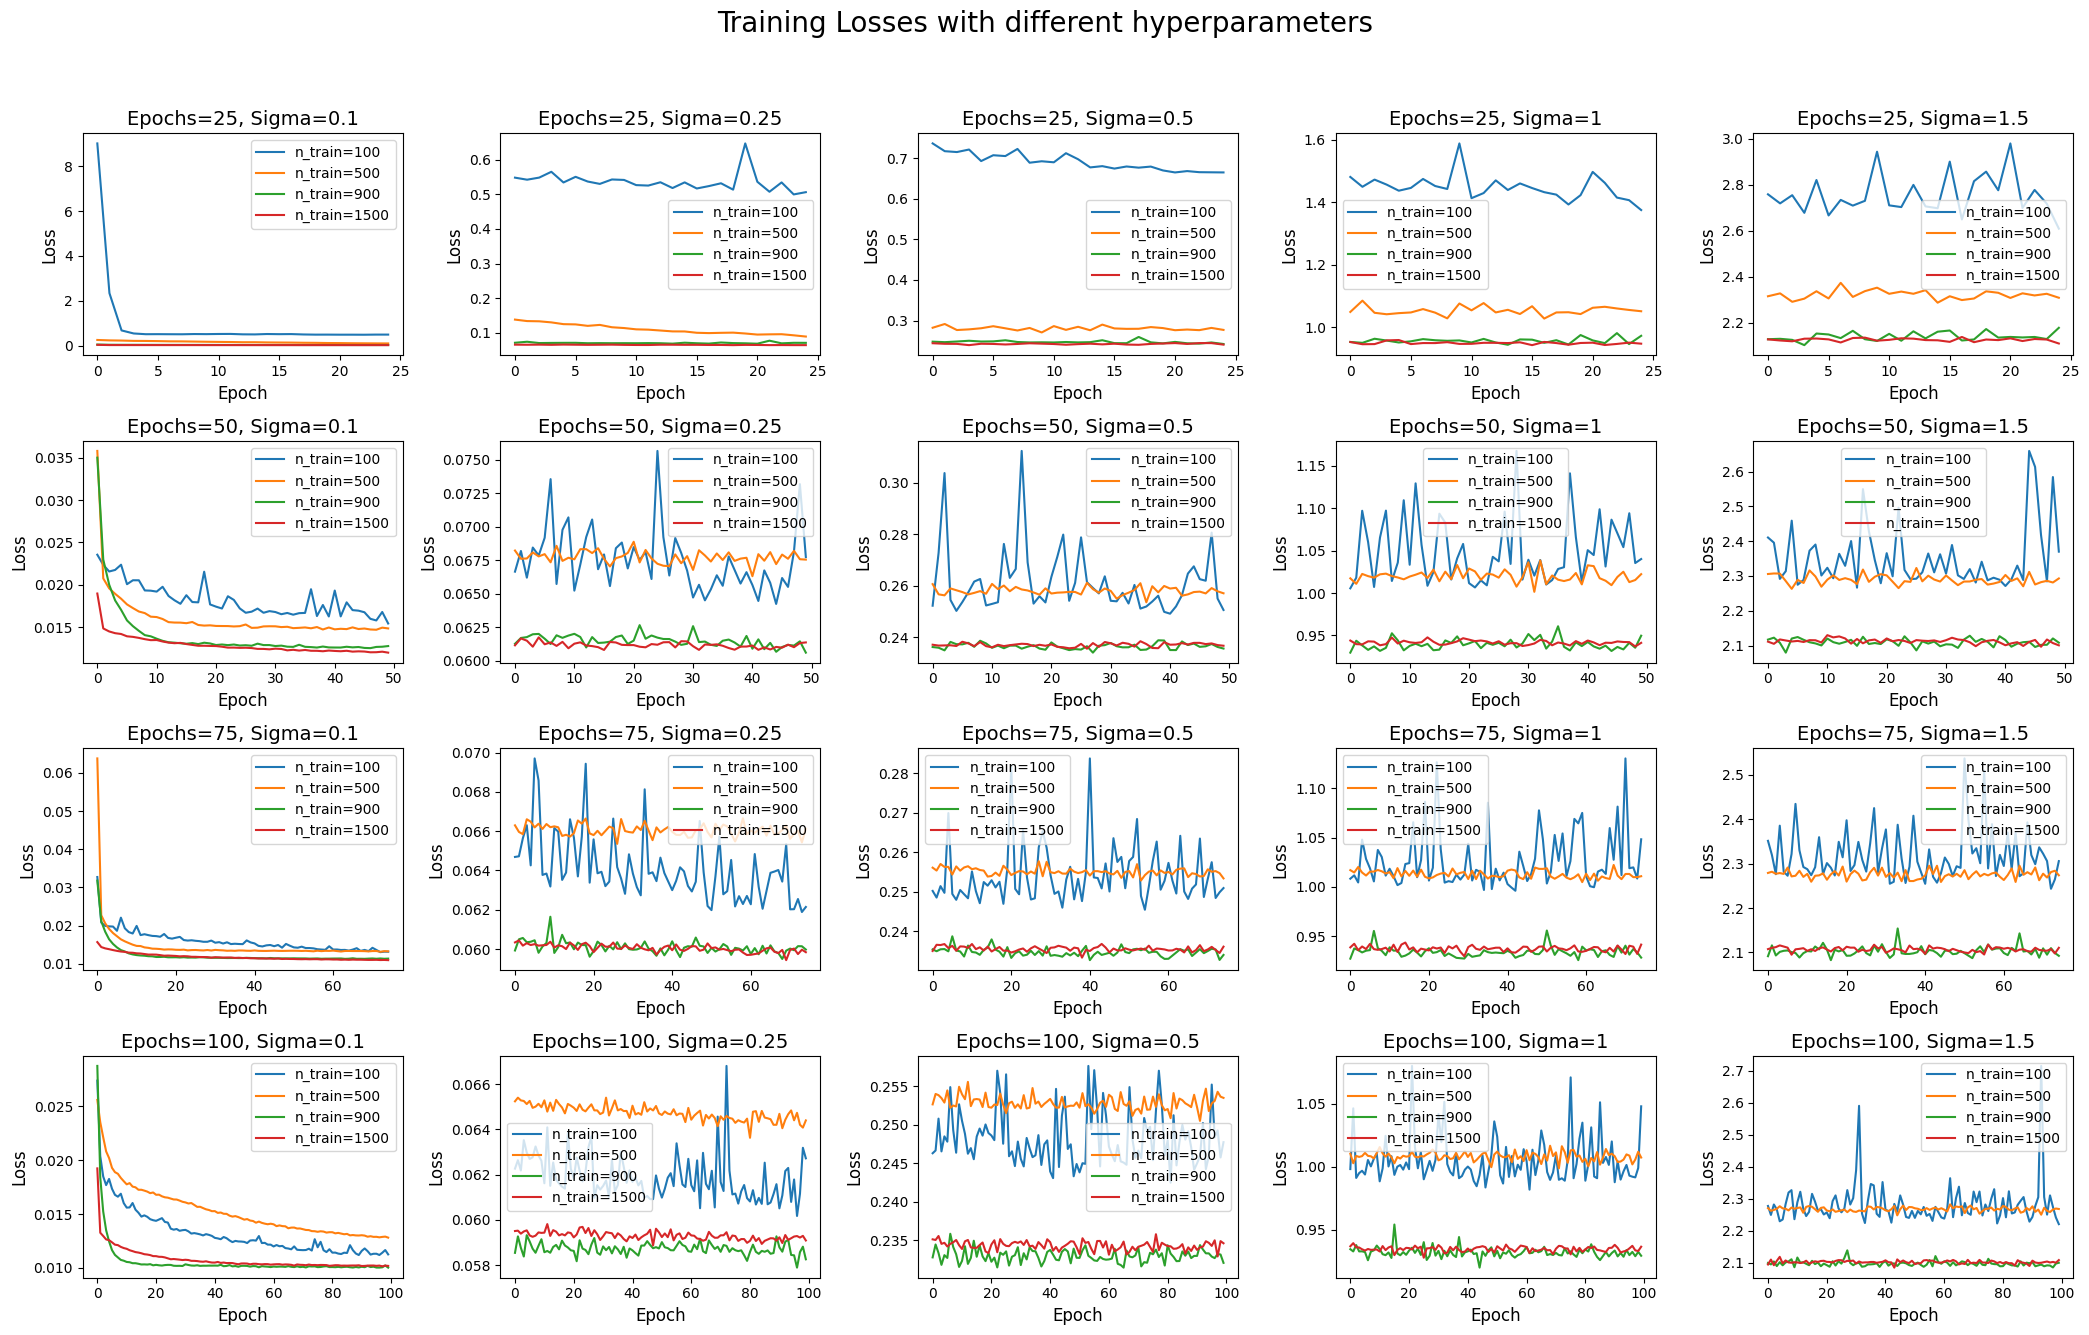

In [14]:
fig, axes = plt.subplots(len(iper_epochs), len(iper_sigma), figsize=(21, 14), sharex=False, sharey=False)
fig.suptitle('Training Losses with different hyperparameters', fontsize=20)

for i, epoch in enumerate(iper_epochs):
    for j, sigma in enumerate(iper_sigma):
        ax = axes[i, j]
        for n_train in iper_ntrain:
            key = f'step_{epoch}_{n_train}_{sigma}'
            if key in history_2:
                ax.plot(history_2[key].history['loss'], label=f'n_train={n_train}')
            
        ax.set_title(f'Epochs={epoch}, Sigma={sigma}',fontsize=14)
        ax.legend()
        ax.set_xlabel('Epoch',fontsize=12)
        ax.set_ylabel('Loss',fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

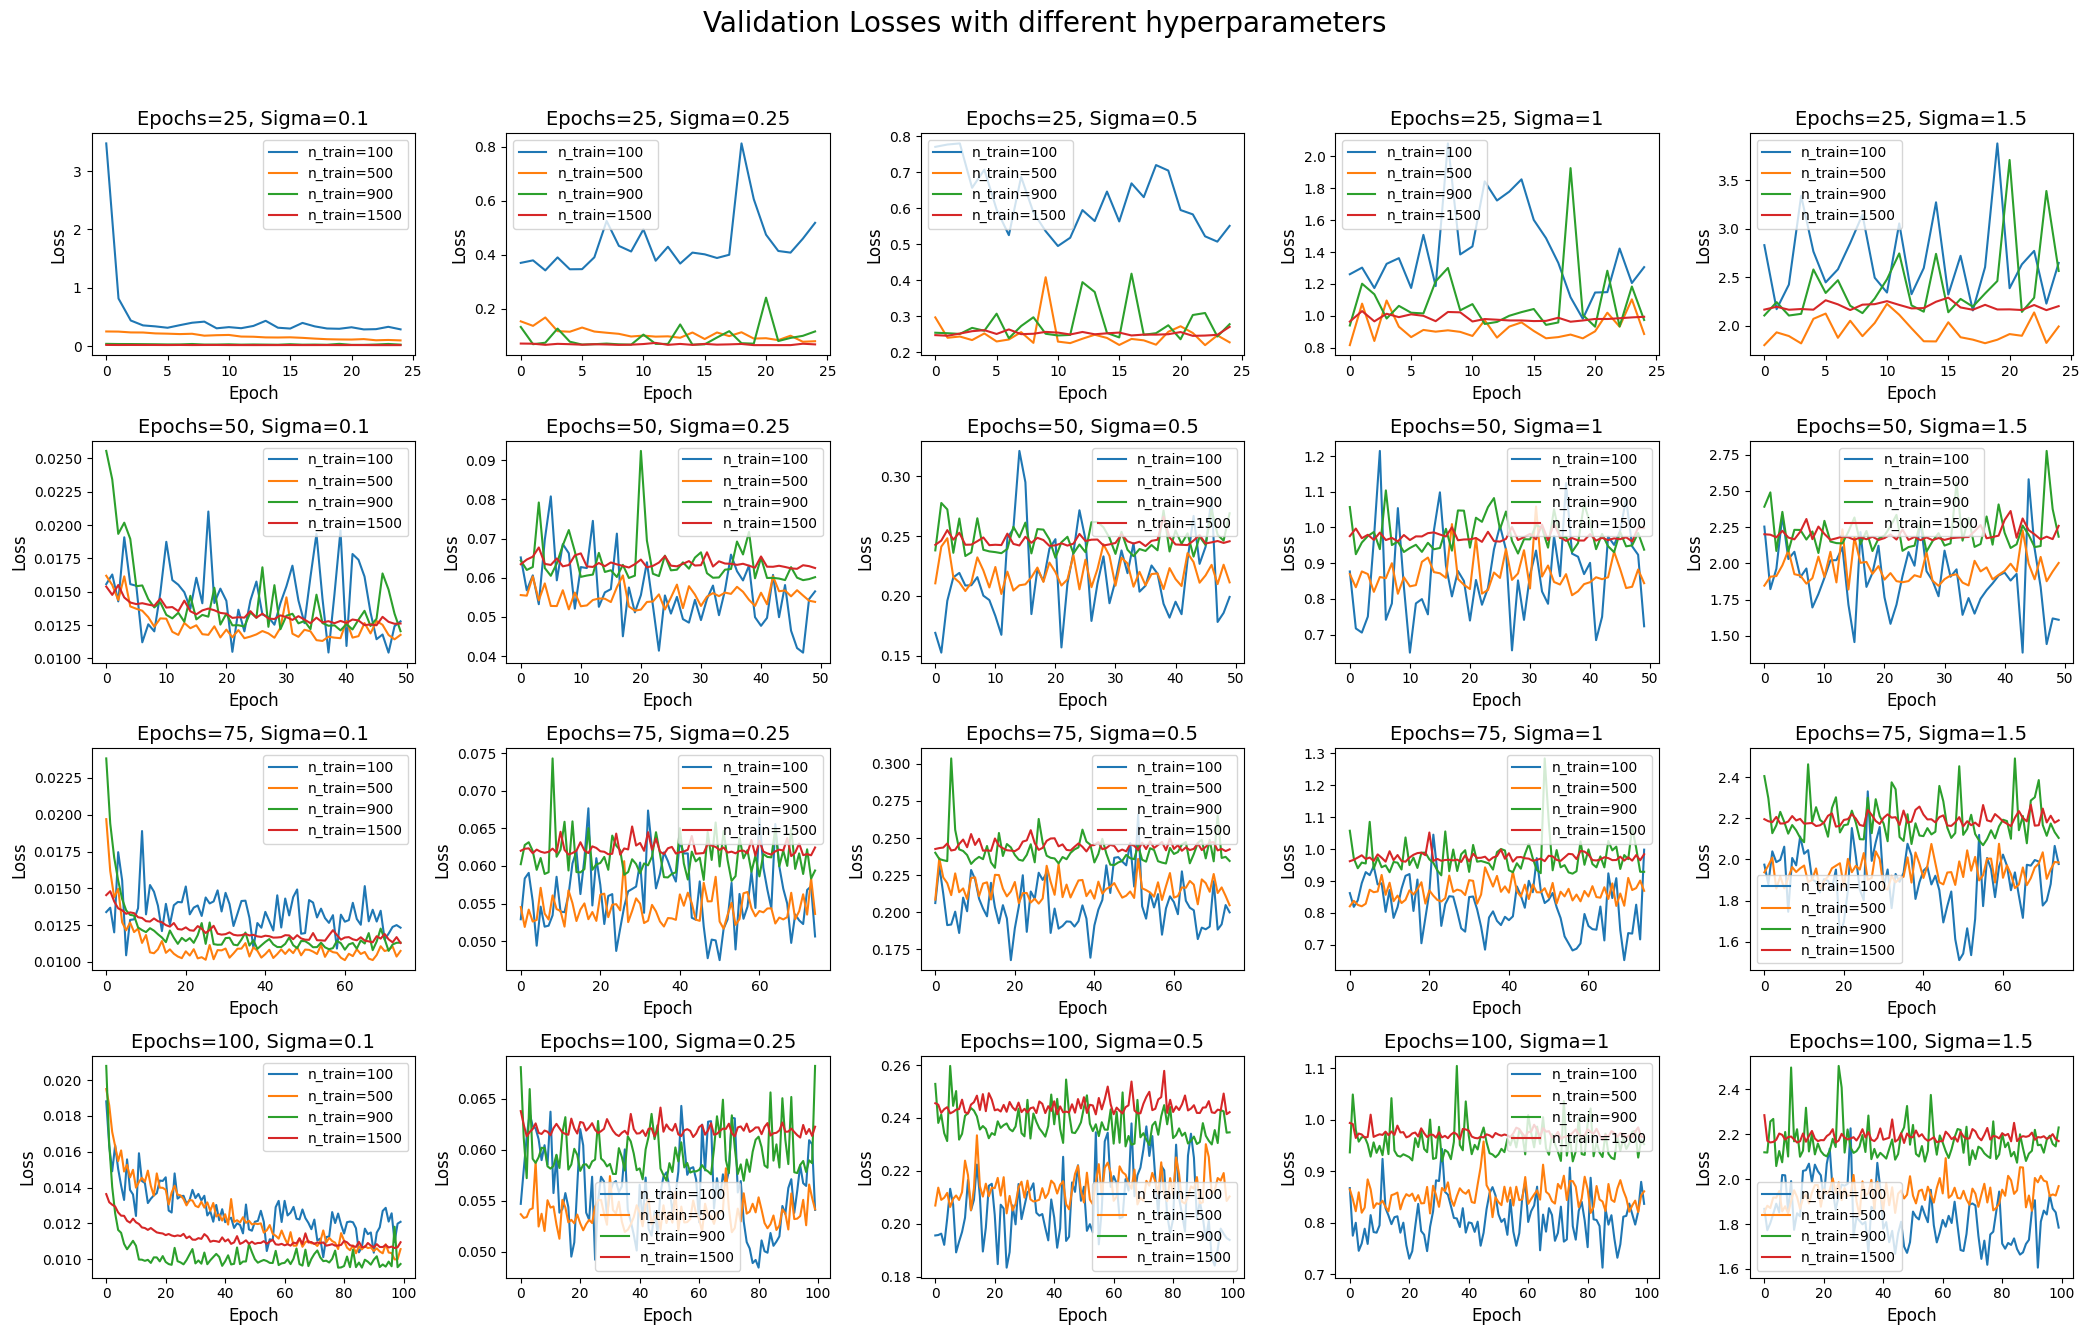

In [15]:
fig, axes = plt.subplots(len(iper_epochs), len(iper_sigma), figsize=(21, 14), sharex=False, sharey=False)
fig.suptitle('Validation Losses with different hyperparameters', fontsize=20)

for i, epoch in enumerate(iper_epochs):
    for j, sigma in enumerate(iper_sigma):
        ax = axes[i, j]
        for n_train in iper_ntrain:
            key = f'step_{epoch}_{n_train}_{sigma}'
            if key in history_2:
                ax.plot(history_2[key].history['val_loss'], label=f'n_train={n_train}')
            
        ax.set_title(f'Epochs={epoch}, Sigma={sigma}',fontsize=14)
        ax.legend()
        ax.set_xlabel('Epoch',fontsize=12)
        ax.set_ylabel('Loss',fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


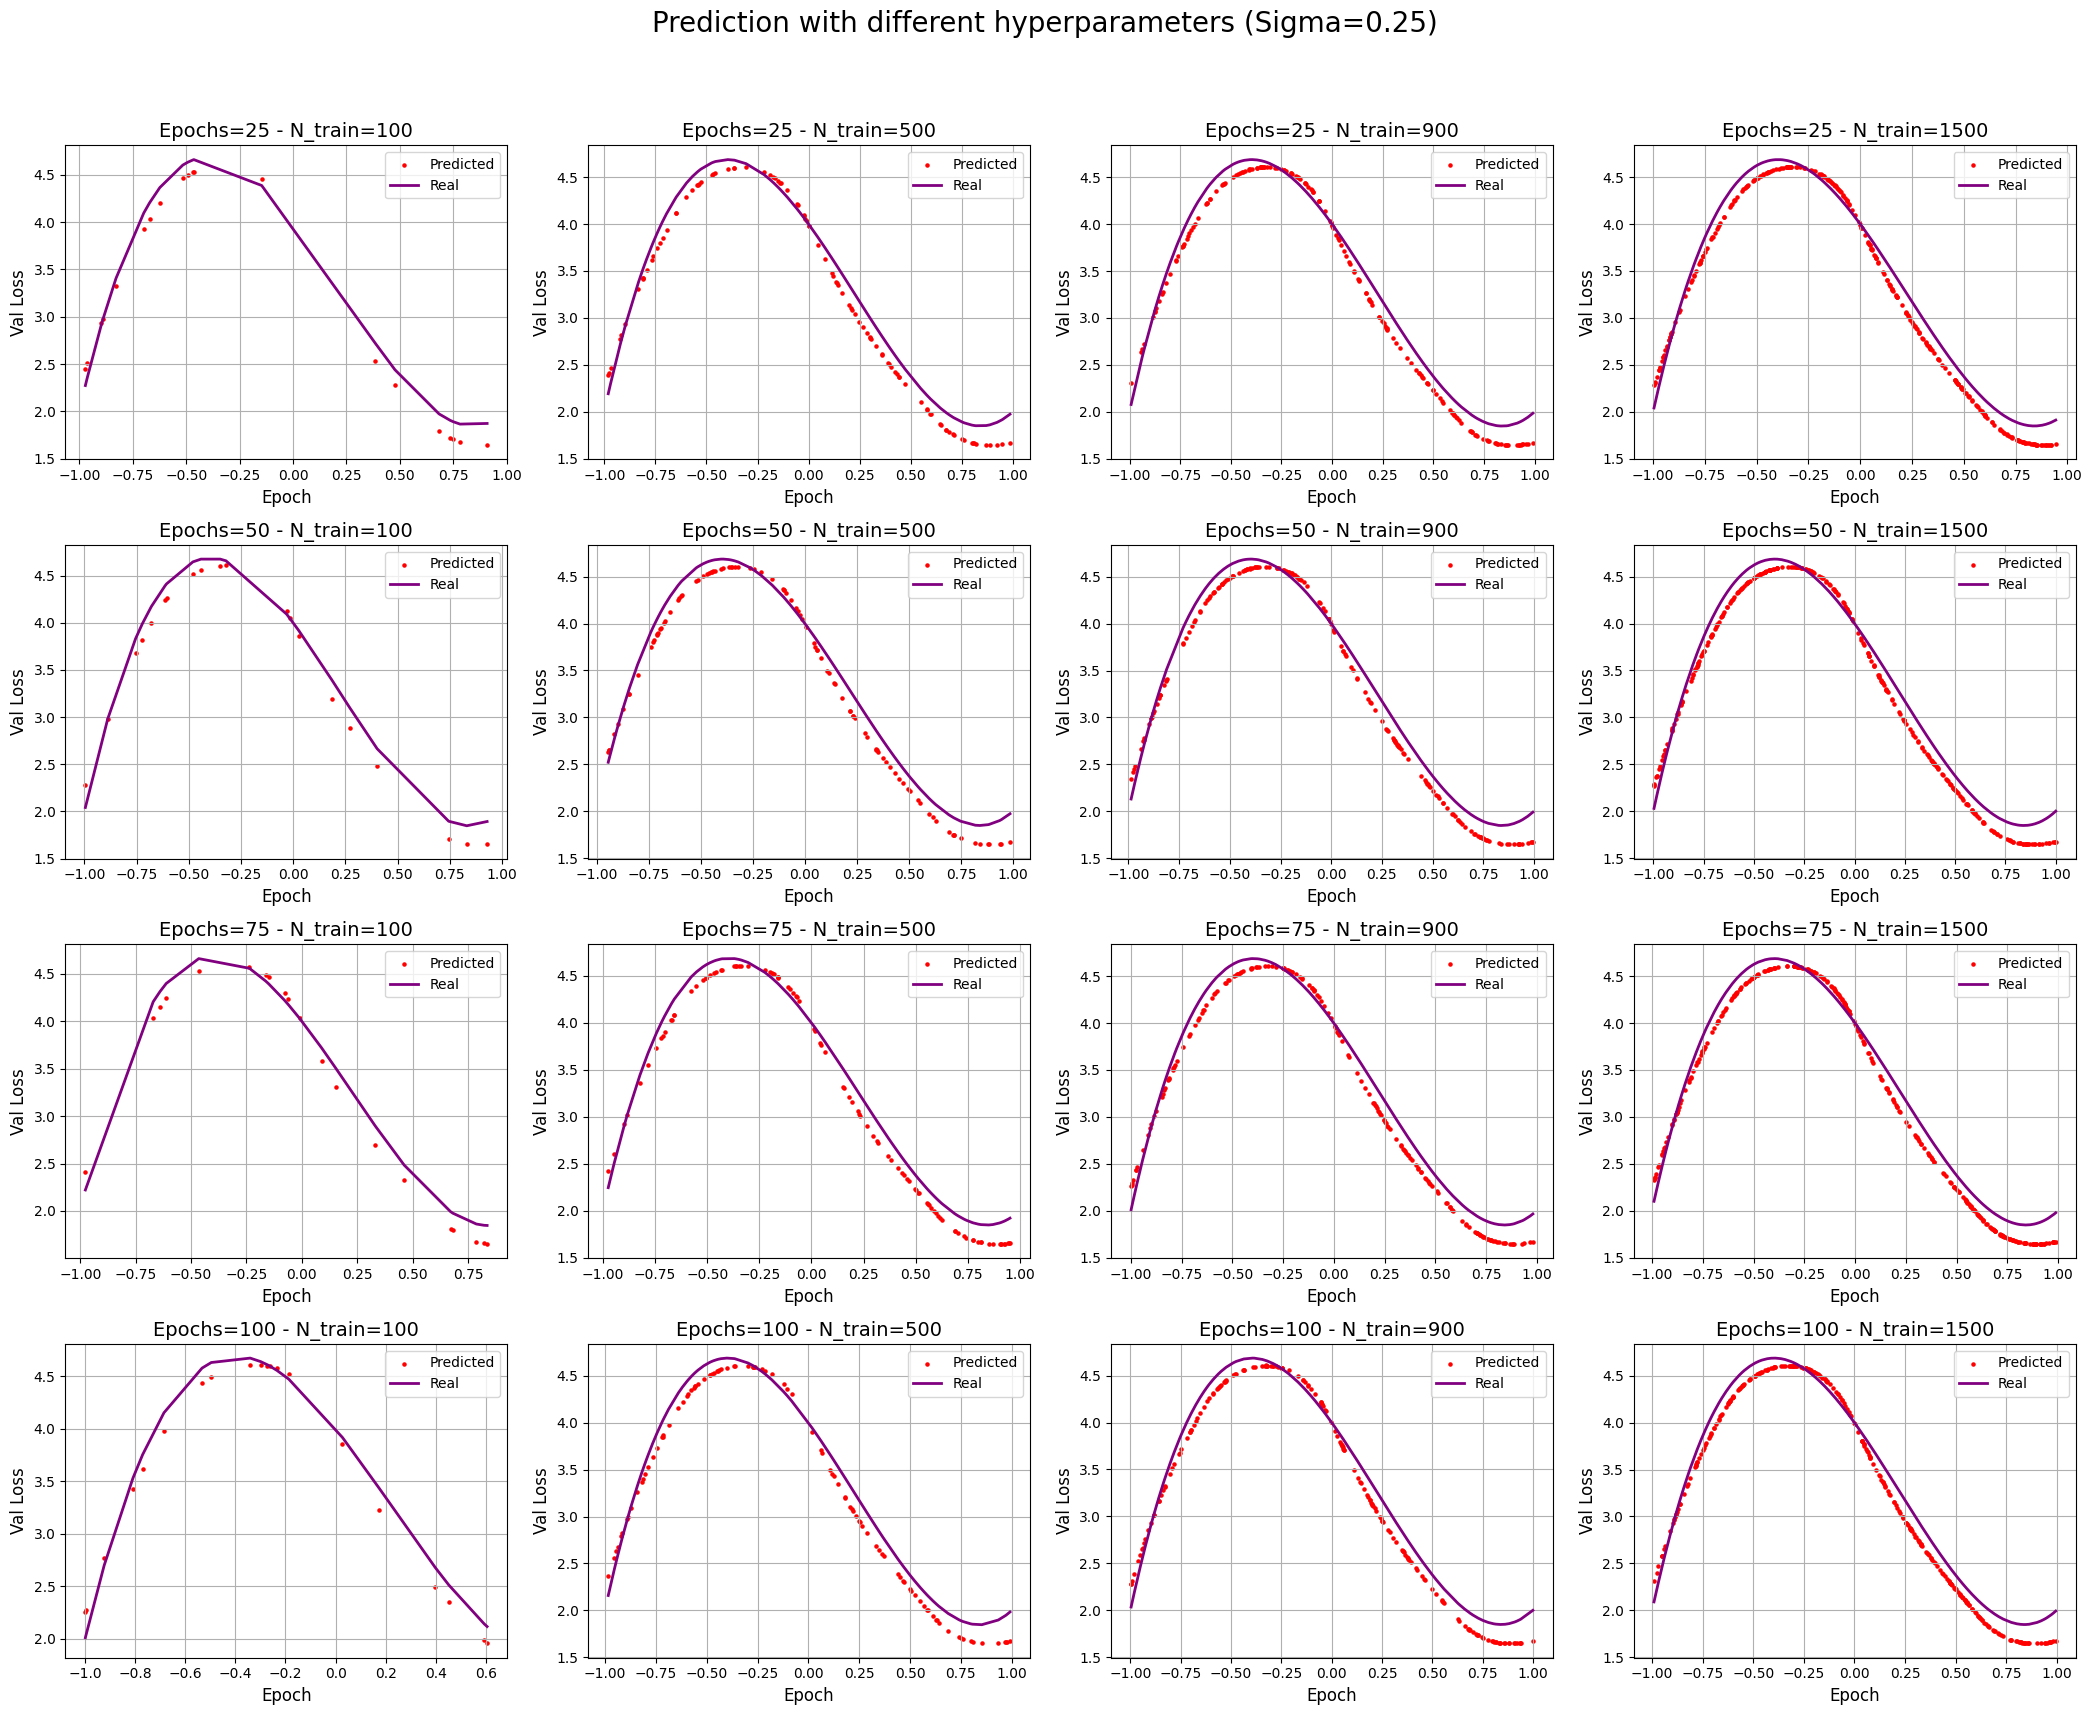

In [16]:
sigma=iper_sigma[1] #change index to get different values of sigma from 0 to 4

fig, axes = plt.subplots(len(iper_epochs), len(iper_ntrain), figsize=(21, 18), sharex=False, sharey=False)
fig.suptitle(f'Prediction with different hyperparameters (Sigma={sigma})', fontsize=20)

for i, epoch in enumerate(iper_epochs):
    for j, n_train in enumerate(iper_ntrain):
        ax = axes[i, j]
        key = f'step_{epoch}_{n_train}_{sigma}'
        x_predicted = np.random.uniform(-1, 1, len(x_valid_2[key]))
        y_predicted = model_1.predict(x_predicted)
        if key in x_valid_2:
            ax.scatter(x_predicted, y_predicted,s=5,color='r',label=r'Predicted')
            x_predicted.sort()
            ax.plot(x_predicted,f(x_predicted) ,linewidth=2,color='purple',label=r'Real')
            
        ax.set_title(f'Epochs={epoch} - N_train={n_train}',fontsize=14)
        ax.legend()
        ax.set_xlabel('Epoch',fontsize=12)
        ax.set_ylabel('Val Loss',fontsize=12)
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [17]:
iper_epochs=[25,50,75,100]
iper_ntrain=[1000,5000,10000]
iper_sigma=[0.1,0.25,0.5,1]

In [18]:
def func(x,y):
    return np.sin(x**2+y**2)

def generate_set_2(n_train,_sigma):

    # generate training inputs
    np.random.seed(0)
    x_train_3 = np.random.uniform(-3/2, 3/2, n_train)
    y_train_3 = np.random.uniform(-3/2, 3/2, n_train)
    x_valid_3 = np.random.uniform(-3/2, 3/2, int(n_train*0.2))
    y_valid_3 = np.random.uniform(-3/2, 3/2, int(n_train*0.2))
    data_train=np.column_stack((x_train_3,y_train_3))
    data_valid=np.column_stack((x_valid_3,y_valid_3))
    data_valid.sort(axis=1)
    z_target = func(data_valid[:,0],data_valid[:,1])# ideal (target) 

    sigma = _sigma # noise standard deviation
    z_train = np.random.normal(func(x_train_3,y_train_3), sigma) # actual measures from which we want to guess regression parameters
    z_valid = np.random.normal(func(data_valid[:,0],data_valid[:,1]), sigma)

    return data_train,z_train,data_valid,z_valid,z_target

In [19]:
keras.backend.clear_session()
model_3 = tf.keras.Sequential()
model_3.add(Dense(32,activation='relu' ,input_shape=(2,)))
model_3.add(Dense(64,activation='relu' ,input_shape=(32,)))
model_3.add(Dense(128,activation='relu',input_shape=(64,)))
model_3.add(Dense(64,activation='relu',input_shape=(128,)))
model_3.add(Dense(32,activation='relu',input_shape=(64)))
model_3.add(Dense(1,input_shape=(32,)))

# compile the model choosing optimizer, loss and metrics objects
model_3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,897 (81.63 KB)

 Trainable params: 20,897 (81.63 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history_3={}
data_valid={}
z_valid={}
score_valid_3={}
score_target_3={}
for elem in iper_epochs:
    for j in iper_ntrain:
        for k in iper_sigma:
            key = f'step_{elem}_{j}_{k}'
            data_train,z_train,data_valid[key],z_valid[key],z_target=generate_set_2(j,k)
            history_3[key]=model_3.fit(x=data_train, y=z_train, batch_size=32, epochs=elem,shuffle=True, validation_data=(data_valid[key], z_valid[key]))
            score_valid_3[key]=model_3.evaluate(data_valid[key], z_valid[key], batch_size=32, verbose=1)
            score_target_3[key]=model_3.evaluate(data_valid[key], z_target, batch_size=32, verbose=1)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3687 - mse: 0.3687 - val_loss: 0.1571 - val_mse: 0.1571
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1565 - mse: 0.1565 - val_loss: 0.1441 - val_mse: 0.1441
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1493 - mse: 0.1493 - val_loss: 0.1431 - val_mse: 0.1431
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1571 - mse: 0.1571 - val_loss: 0.1422 - val_mse: 0.1422
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1561 - mse: 0.1561 - val_loss: 0.1407 - val_mse: 0.1407
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1662 - mse: 0.1662 - val_loss: 0.1393 - val_mse: 0.1393
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1631 - mse: 0.1631 - val_loss: 0.1387 - val_mse: 0.1387
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1499 - mse: 0.1499 - val_loss: 0.1384 - val_mse: 0.1384
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1442 - mse:

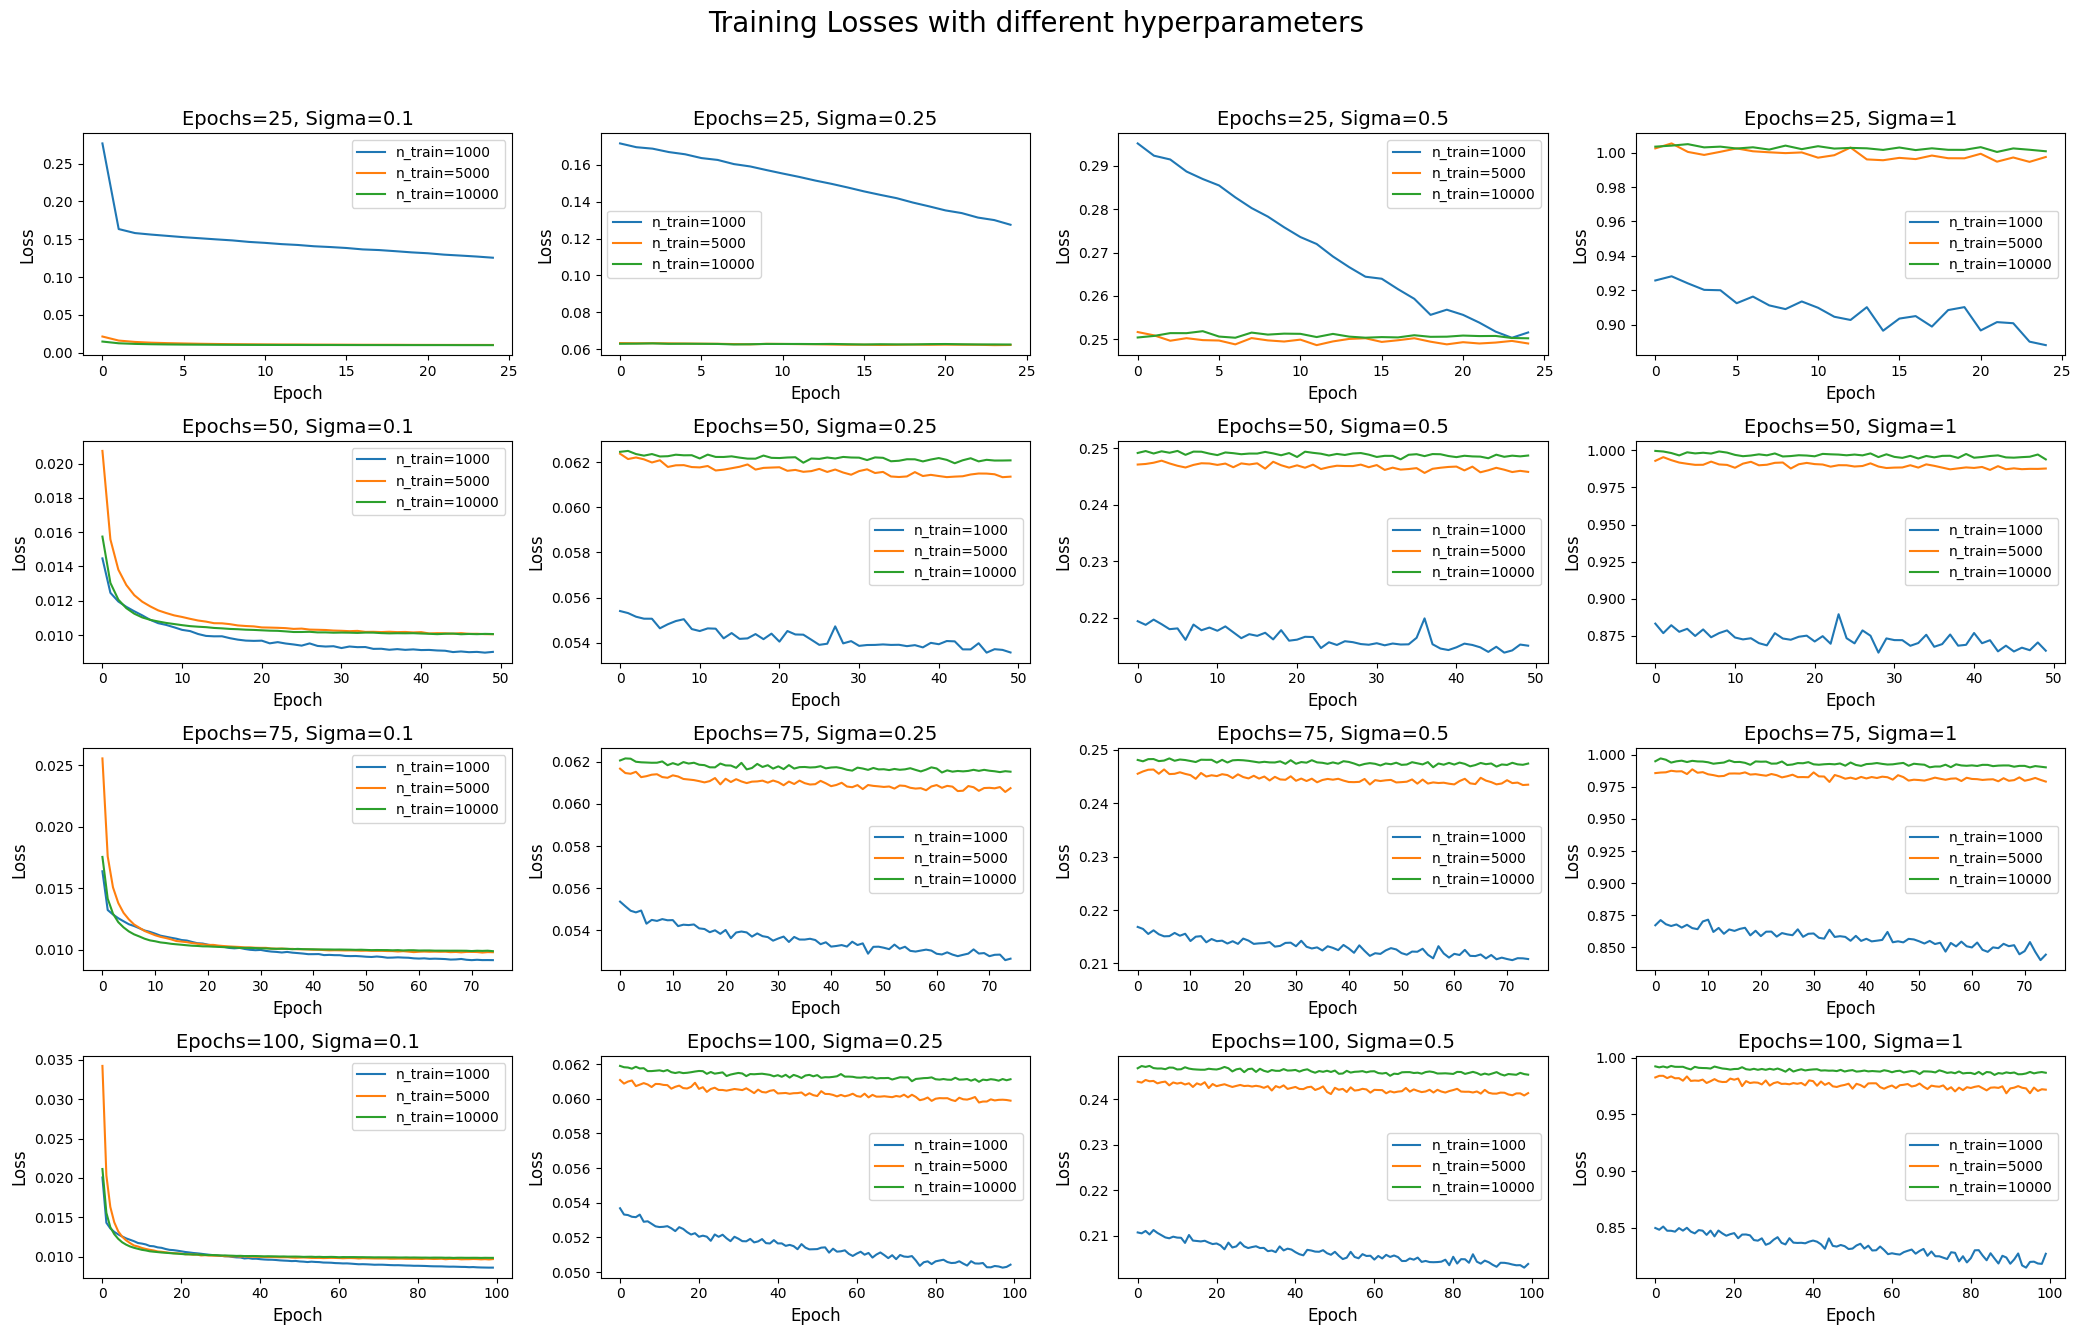

In [21]:
fig, axes = plt.subplots(len(iper_epochs), len(iper_sigma), figsize=(21, 14), sharex=False, sharey=False)
fig.suptitle('Training Losses with different hyperparameters', fontsize=20)

for i, epoch in enumerate(iper_epochs):
    for j, sigma in enumerate(iper_sigma):
        ax = axes[i, j]
        for n_train in iper_ntrain:
            key = f'step_{epoch}_{n_train}_{sigma}'
            if key in history_3:
                ax.plot(history_3[key].history['loss'], label=f'n_train={n_train}')
            
        ax.set_title(f'Epochs={epoch}, Sigma={sigma}',fontsize=14)
        ax.legend()
        ax.set_xlabel('Epoch',fontsize=12)
        ax.set_ylabel('Loss',fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

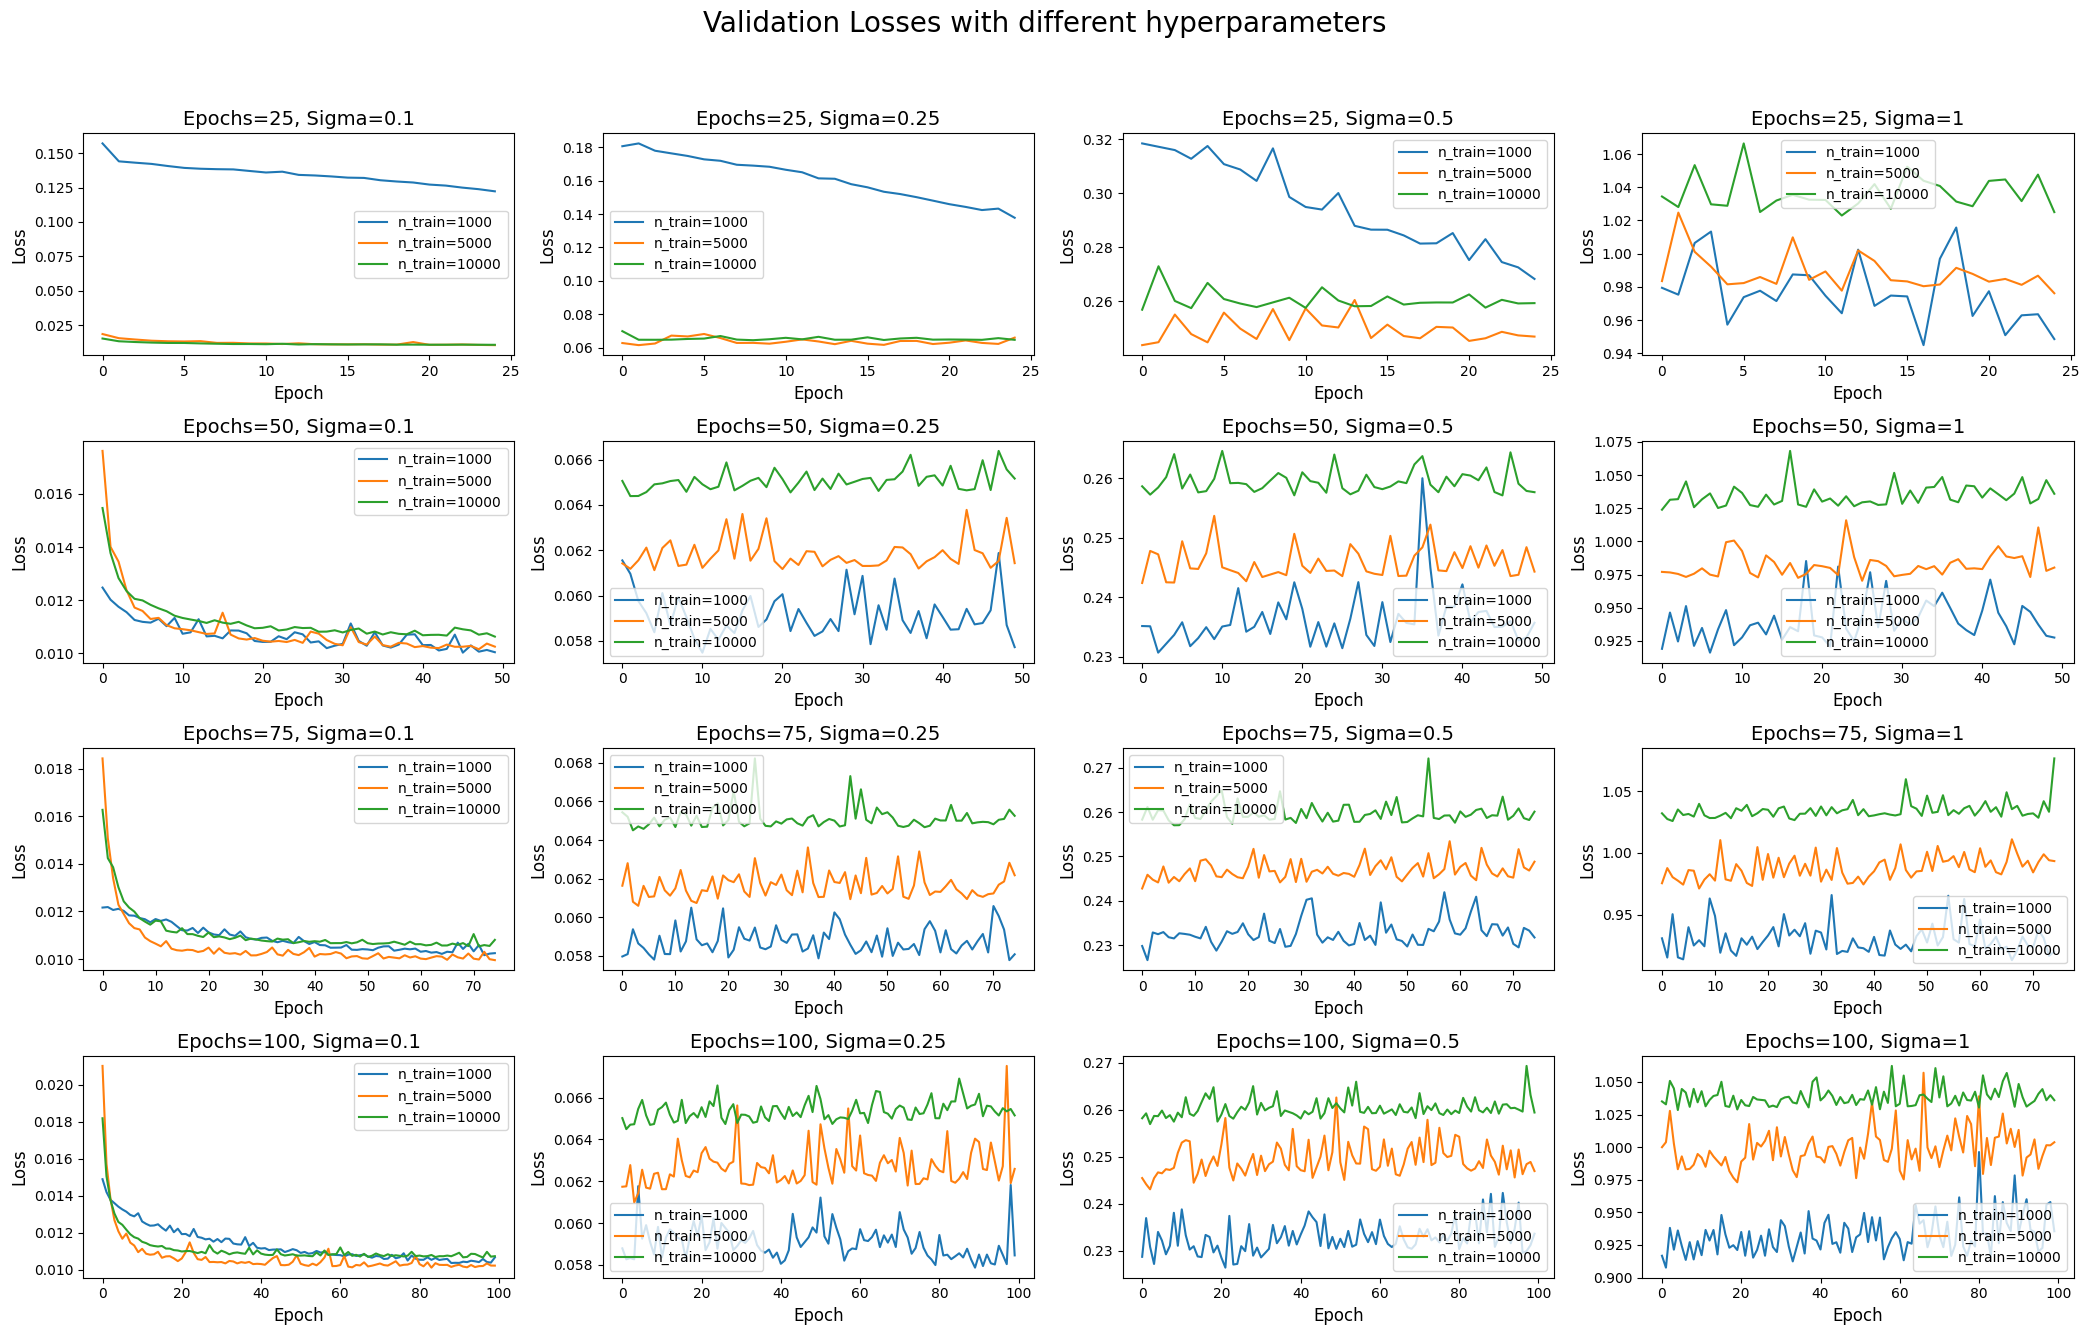

In [22]:
fig, axes = plt.subplots(len(iper_epochs), len(iper_sigma), figsize=(21, 14), sharex=False, sharey=False)
fig.suptitle('Validation Losses with different hyperparameters', fontsize=20)

for i, epoch in enumerate(iper_epochs):
    for j, sigma in enumerate(iper_sigma):
        ax = axes[i, j]
        for n_train in iper_ntrain:
            key = f'step_{epoch}_{n_train}_{sigma}'
            if key in history_3:
                ax.plot(history_3[key].history['val_loss'], label=f'n_train={n_train}')
            
        ax.set_title(f'Epochs={epoch}, Sigma={sigma}',fontsize=14)
        ax.legend()
        ax.set_xlabel('Epoch',fontsize=12)
        ax.set_ylabel('Loss',fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
32/32 ━━━━━━━━━━━━━━━

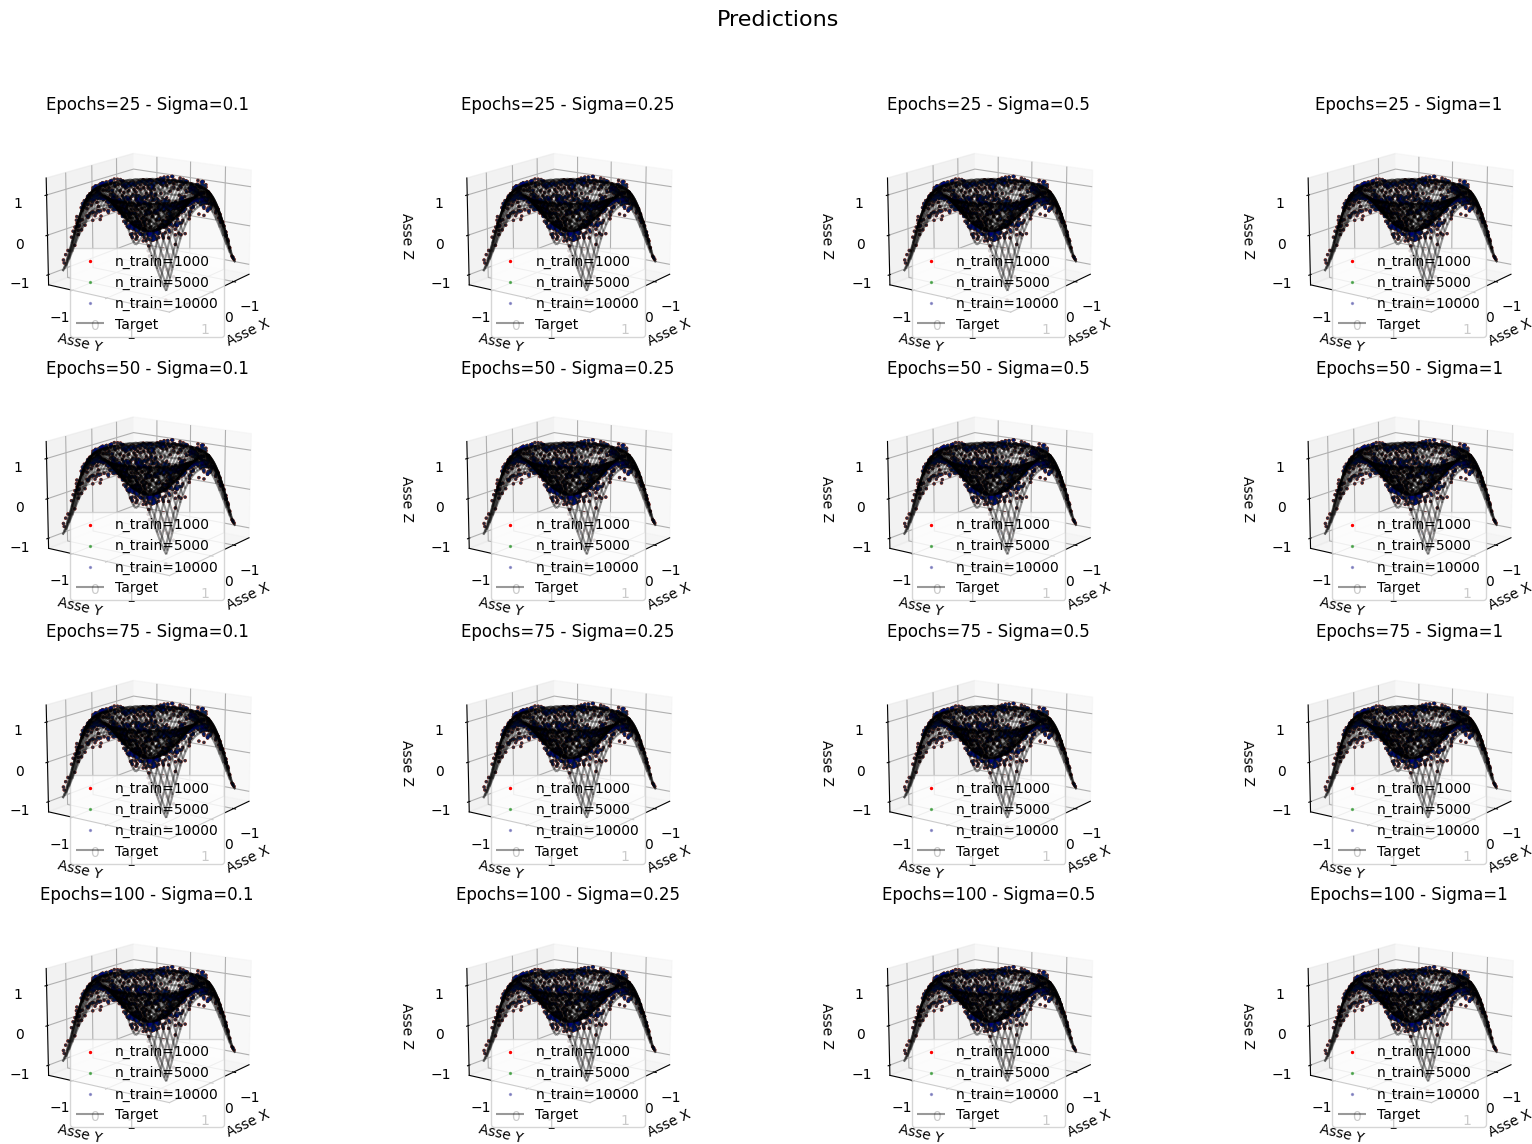

In [23]:
x_predicted = np.random.uniform(-3/2, 3/2, 1000)
y_predicted = np.random.uniform(-3/2, 3/2, 1000)
data_predicted = np.column_stack((x_predicted, y_predicted))

fig, axes = plt.subplots(len(iper_epochs), len(iper_sigma), figsize=(18, 12), subplot_kw={'projection': '3d'})
fig.suptitle('Predictions', fontsize=16)

x_surf = np.arange(-1.5, 1.5, 0.05)
y_surf = np.arange(-1.5, 1.5, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)

for i, epoch in enumerate(iper_epochs):
    for j, sigma in enumerate(iper_sigma):
        ax = axes[i, j]
        colors=['red','green','navy']
        
        for k,n_train in enumerate(iper_ntrain):
            key = f'step_{epoch}_{n_train}_{sigma}'
            if key in data_valid:
                z_predicted = model_3.predict(data_predicted)
                
                ax.scatter(x_predicted, y_predicted, z_predicted,color=colors[k], s=2, alpha=1/(k+1) ,label=f'n_train={n_train}')
        
        ax.plot_wireframe(X_surf, Y_surf, func(X_surf, Y_surf), alpha=0.4, color='black',label='Target')
        
        ax.set_title(f'Epochs={epoch} - Sigma={sigma}')
        ax.set_xlabel('Asse X')
        ax.set_ylabel('Asse Y')
        ax.set_zlabel('Asse Z')
        ax.legend()
        ax.view_init(15, 35)

# Allineamento e visualizzazione
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [259]:
# evaluate model
score_3 = model_3.evaluate(data_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0217 - mse: 1.0217

Test loss: 1.0531610250473022
Test accuracy: 1.0531610250473022


In [260]:
# evaluate model with the exact curve
score_3 = model_3.evaluate(data_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0196 - mse: 0.0196

Test loss: 0.019963828846812248
Test accuracy: 0.019963828846812248


Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>